In [1]:
from pylab import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:

#time which we want to analyze
Y=2. # number of years
dY=52. # intervals of years (supposing equal onboarding probability throughout the year)

#Average € per investors
T=10000 #average € investment per company
tokenscale=1000000 #resize € scale
Threshold=5000000/tokenscale #initial tokens
Goal =400 #Threshold of companies in a field

In [3]:
#stuff needed for the program to run

S=int(Y*dY) # number of steps
Years=[0]*S
#N=[0]*S
# Inv=[0]*S #new investors
# InvTot=[0]*(S+2)  #total investors
rev=[0]*S #Total revenue
for t in range(0,S):
    Years[t]=t/dY #+2022

def show(InvTot):
     return plot(InvTot[S+1],InvTot[S], marker="o", markersize=5 )#,axvline(x=InvTot[S+1], ymin=0.0, ymax=Goal)

In [4]:
#N[1-e^(-t*R)]  where N is the total number of companies and R is the probability they join
def model(ind):
    #introduce delay
    Delay=1+int(ind[2]*dY)
    #clean new arrays
    Inv=[0]*S #new investors
    InvTot=[0]*(S) #Total investors per time
    N=[0]*S #Number of total companies remaining
    #initialize them
    N[Delay-1]=ind[0]*ind[1] # the possible inverstors are the percentage on the total companies
    Inv[0]=0
    R=ind[1]/5  #we assume investors decide in the first 5 years equally distributed 
    #Delay=1+int(ind[2]*dY)
    #print(Delay)
    for t in range(Delay,S):
        #R=R+(randn()/1000)     ## uncomment to add fluctuations
        Inv[t]=N[t-1]*R
        InvTot[t]=(InvTot[t-1] + Inv[t])   
        N[t]=(N[t-1] - Inv[t]) 
        rev[t]=InvTot[t]*(T/tokenscale) +rev[t]
        R=R + InvTot[t]/10000
#When do we reach the goal of investors in each industry?        
#         if InvTot[t] <= Goal:  
#             InvTot[S]=InvTot[t]
#             InvTot[S+1]=t/dY 
#     #show(InvTot)        
    return InvTot #number of total investors per period of time

In [5]:
#All the scenarios have the following suppositions
#1: given an industry, we expect the 10% of companies to join
#2: The investors are spread in a 5 years periods


In [6]:
#Scenario 1(WCS): only Juice industry joins

ValueError: x and y must have same first dimension, but have shapes (104,) and (102,)

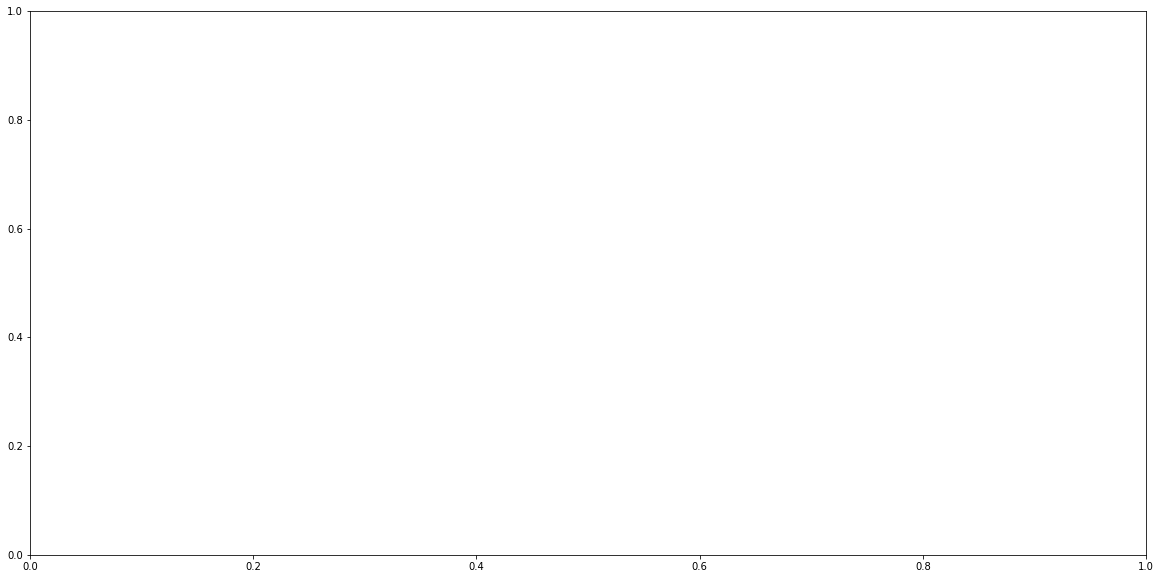

In [7]:
Juice=[5000,1/10,0.]
rev=[0]*S
fig=figure(figsize=(20,10))
JuicyChain=model(Juice)
plot(Years, JuicyChain[0:-2] , label="Juicychain" )
xlabel("Years")
ylabel("Investors")
legend(frameon=False)
axes=fig.add_axes([0.50, 0.2, 0.4, 0.5])
axes.plot(Years, rev, color='r')
axes.axhline(y=Threshold*(1-Juice[1]),color='b')
axes.text(1.,Threshold +1,'4.5 Millions')
xlabel("Years")
ylabel(str(tokenscale)+" €")
tight_layout()

In [ ]:
#Scenario 2(Base): simultaneously 3 industries join (Juice, Soy, Fish)

In [ ]:
Juice      =       [   5000    ,   1/10  ,   0.    ]
Soy        =       [   7000    ,   1/10  ,   0.    ]
Fish       =       [   12000   ,   1/10  ,   0.    ]
rev=[0]*S
fig=figure(figsize=(20,10))
JuicyChain=model(Juice)
plot(Years, JuicyChain[0:-2] , label="Juicychain" )
SoyChain=model(Soy)
plot(Years, SoyChain[0:-2], label="SoyChain")
FishChain=model(Fish)
plot(Years, FishChain[0:-2], label="FishChain")
xlabel("Years")
ylabel("Investors")
legend(frameon=False)
axes=fig.add_axes([0.6, 0.0, 0.28, 0.35])
axes.plot(Years, rev, color='r')
axes.axhline(y=Threshold,color='b')
axes.text(1.,Threshold +1,'5 Millions')
xlabel("Years")
ylabel(str(tokenscale)+" €")
tight_layout()

In [ ]:
#Scenario 2.5(Base): 3 industries join with launches each year 

In [ ]:
Juice      =       [   5000    ,   1/10  ,   0.    ]
Soy        =       [   7000    ,   1/10  ,   1.    ]
Fish       =       [   12000   ,   1/10  ,   1.5    ]
rev=[0]*S
fig=figure(figsize=(20,10))
JuicyChain=model(Juice)
plot(Years, JuicyChain[0:-2] , label="Juicychain" , color="orange")
SoyChain=model(Soy)
plot(Years, SoyChain[0:-2], label="SoyChain", color="green")
FishChain=model(Fish)
plot(Years, FishChain[0:-2], label="FishChain", color="blue")
xlabel("Years")
ylabel("Investors")
legend(frameon=False)
axes=fig.add_axes([0.13, 0.6, 0.28, 0.35])
axes.plot(Years, rev, color='r')
axes.axhline(y=Threshold,color='b')
axes.text(1.,Threshold +1,'5 Millions')
xlabel("Years")
ylabel(str(tokenscale)+" €")
tight_layout()

In [ ]:
#Scenario 3(BCS): 6 companies join simultaneously

In [ ]:
Juice      =       [   5000    ,   1/10  ,   0. ]
Soy        =       [   7000    ,   1/10  ,   0. ]
Fish       =       [   12000   ,   1/10  ,   0. ]
OliveOil   =       [   10000   ,   1/10  ,   0. ]
Cacao      =       [   5000    ,   1/10  ,   0. ]
Coffee     =       [   5000    ,   1/10  ,   0. ]

rev=[0]*S
fig=figure(figsize=(20,10))
JuicyChain=model(Juice)
plot(Years, JuicyChain[0:-2] , label="Juicychain" , color="orange")
SoyChain=model(Soy)
plot(Years, SoyChain[0:-2], label="SoyChain", color="green")
FishChain=model(Fish)
plot(Years, FishChain[0:-2], label="FishChain", color="blue")
OliveOilChain=model(OliveOil)
plot(Years, OliveOilChain[0:-2], label="OliveOilChain")
CoffeeChain=model(Coffee)
plot(Years, CoffeeChain[0:-2], label="CoffeeChain")
CacaoChain=model(Cacao)
plot(Years, CacaoChain[0:-2], label="CacaoChain") 
xlabel("Years")
ylabel("Investors")
legend(frameon=False)
axes=fig.add_axes([0.13, 0.6, 0.28, 0.35])
axes.plot(Years, rev, color='r')
axes.axhline(y=Threshold,color='b')
axes.text(1.,Threshold +1,'5 Millions')
xlabel("Years")
ylabel(str(tokenscale)+" €")
tight_layout()



In [8]:
#Scenario 3.5(BCS): 6 companies join each delayed 1 year

ValueError: x and y must have same first dimension, but have shapes (104,) and (102,)

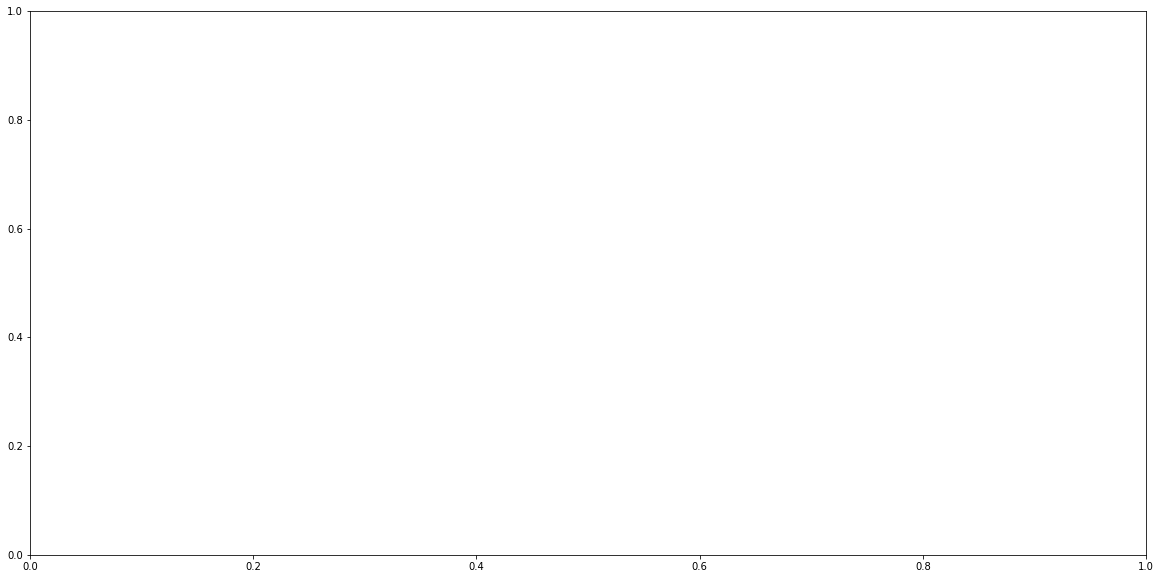

In [9]:
Juice      =       [   5000    ,   1/10  ,   0. ]
#Soy        =       [   7000    ,   1/10  ,   1. ]
Fish       =       [   15000   ,   1/10  ,   0.25 ]
OliveOil   =       [   1000   ,   1/10  ,   0.5 ]
Cacao      =       [   2000    ,   1/10  ,   0.75 ]
#Coffee     =       [   5000    ,   1/10  ,   5. ]


# olive oil 	12	1000
# fish 	552	15000
# cacao	18	2000

rev=[0]*S
fig=figure(figsize=(20,10))
JuicyChain=model(Juice)
plot(Years, JuicyChain[0:-2] , label="Juicychain" , color="orange")
# SoyChain=model(Soy)
# plot(Years, SoyChain[0:-2], label="SoyChain", color="green")
FishChain=model(Fish)
plot(Years, FishChain[0:-2], label="FishChain", color="blue")
OliveOilChain=model(OliveOil)
plot(Years, OliveOilChain[0:-2], label="OliveOilChain")
# CoffeeChain=model(Coffee)
# plot(Years, CoffeeChain[0:-2], label="CoffeeChain")
CacaoChain=model(Cacao)
plot(Years, CacaoChain[0:-2], label="CacaoChain") 
xlabel("Years")
ylabel("Investors")
legend(frameon=False)
axes=fig.add_axes([0.13, 0.6, 0.28, 0.35])
axes.plot(Years, rev, color='r')
axes.axhline(y=Threshold,color='b')
axes.text(1.,Threshold +1,'5 Millions')
xlabel("Years")
ylabel(str(tokenscale)+" €")
tight_layout()


In [10]:
# Custom Scenario: make you own

In [11]:

#Industry     #      Investors ,    %    ,  onboaring delay (Years)

# Juice      =       [   5000    ,   1/10  ,   0.    ]
# Soy        =       [   7000    ,   1/10  ,   1.    ]
# Fish       =       [   12000   ,   1/10  ,   0.  ]
# Cacao      =       [   5000    ,   1/10  ,   0.    ]
# PetFood    =       [   5000    ,   1/10  ,   3.    ]
# Eggs       =       [   5000    ,   1/10  ,   5.    ]
# Coffee     =       [   5000    ,   1/10  ,   6.    ] 
# Fruits     =       [   5000    ,   1/10  ,   5.    ]
# Vegetables =       [   5000    ,   1/10  ,   4.    ]
# Potato     =       [   5000    ,   1/10  ,   3.    ]
# Rice       =       [   5000    ,   1/10  ,   2.    ]
# Chef       =       [   5000    ,   1/30  ,   1.    ]
# OliveOil   =       [   10000   ,   1/10  ,   0.    ]
# Custom     =       [      10   ,   1/10  ,   0.    ]


# rev=[0]*S
# fig=figure(figsize=(20,10))

# JuicyChain=model(Juice)
# plot(Years, JuicyChain[0:-2] , label="Juicychain" , color="orange")

# SoyChain=model(Soy)
# plot(Years, SoyChain[0:-2], label="SoyChain", color="green")

# FishChain=model(Fish)
# plot(Years, FishChain[0:-2], label="FishChain", color="blue")

# OliveOilChain=model(OliveOil)
# plot(Years, OliveOilChain[0:-2], label="OliveOilChain")

# CacaoChain=model(Cacao)
# plot(Years, CacaoChain[0:-2], label="CacaoChain")

# PetChain=model(PetFood)
# plot(Years, PetChain[0:-2], label="PetChain")

# EggChain=model(Eggs)
# plot(Years, EggChain[0:-2], label="EggChain")

# CoffeeChain=model(Coffee)
# plot(Years, CoffeeChain[0:-2], label="CoffeeChain")

# EggChain=model(Fruits)
# plot(Years, EggChain[0:-2], label="EggChain")

# VegChain=model(Vegetables)
# plot(Years, VegChain[0:-2], label="VegChain")

# PotatoChain=model(Potato)
# plot(Years, PotatoChain[0:-2], label="PotatoChain")

# RiceChain=model(Rice)
# plot(Years, RiceChain[0:-2], label="RiceChain")

# ChefChain=model(Chef)
# plot(Years, ChefChain[0:-2], label="ChefChain")

# CustomChain=model(Custom)
# plot(Years, CustomChain[0:-2], label="CustomChain")

# xlabel("Years")
# ylabel("Investors")
# legend(frameon=False)
# axes=fig.add_axes([0.13, 0.6, 0.28, 0.35])
# axes.plot(Years, rev, color='r')
# axes.axhline(y=Threshold,color='b')
# axes.text(1.,Threshold +1,'5 Millions')
# xlabel("Years")
# ylabel(str(tokenscale)+" €")
# tight_layout()

In [12]:
#scenarios overlap 1, 2.5, 3.5 

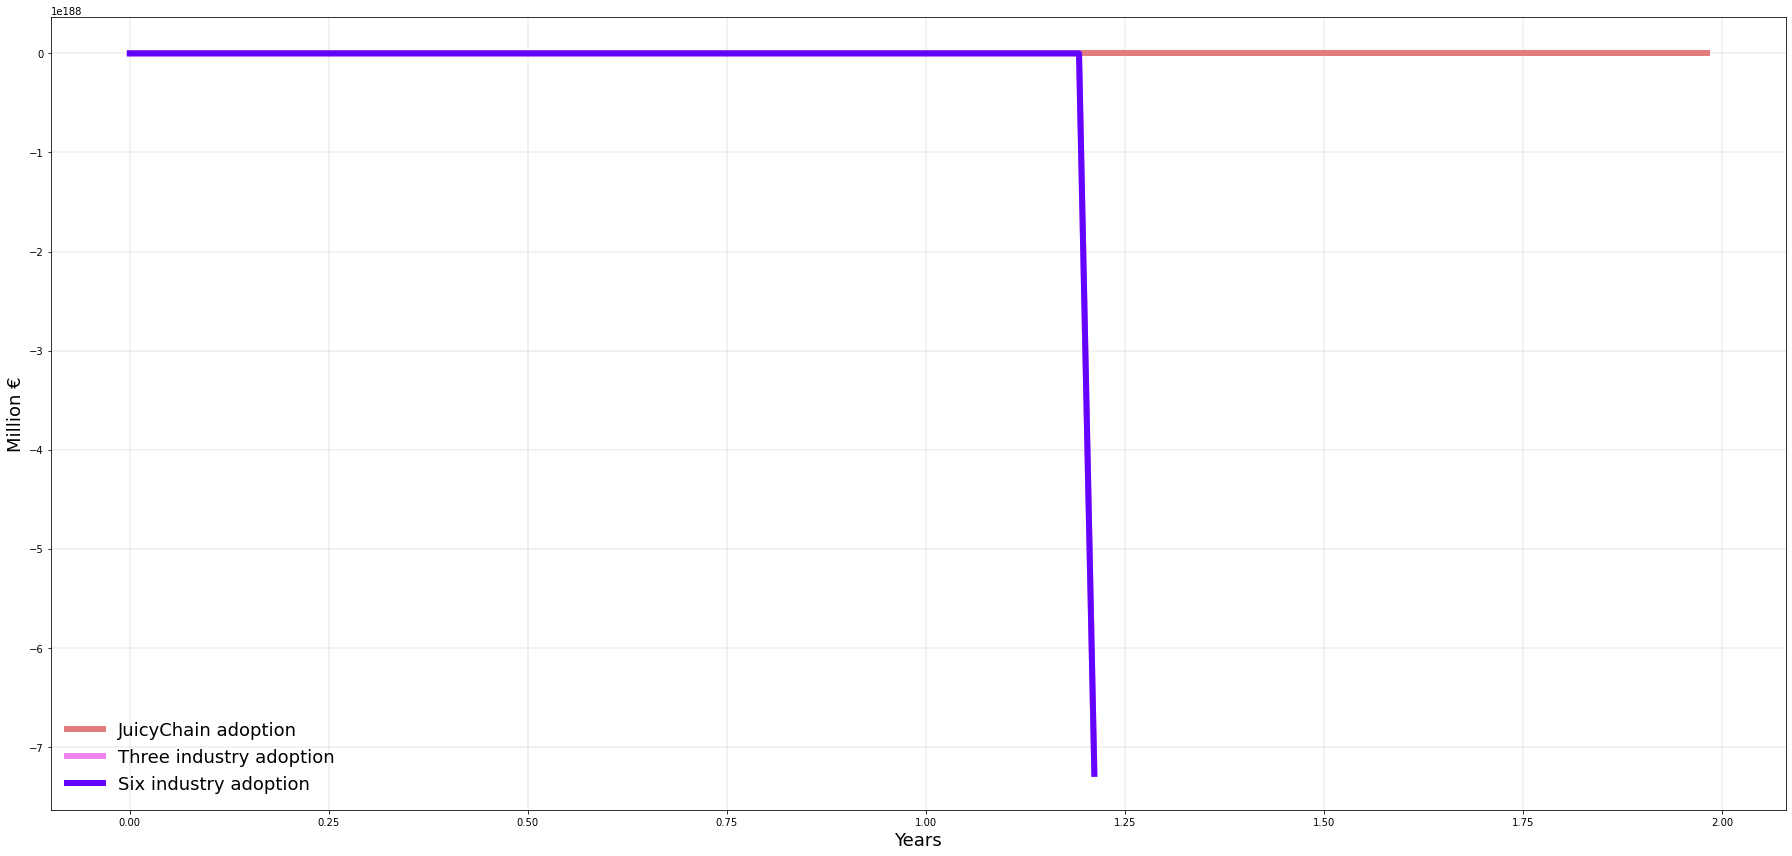

In [13]:
fig=figure(figsize=(25,12))


# #Delayed
# Juice      =       [   5000    ,   1/10  ,   0. ]
# Soy        =       [   7000    ,   1/10  ,   1. ]
# Fish       =       [   12000   ,   1/10  ,   2. ]
# OliveOil   =       [   10000   ,   1/10  ,   3. ]
# Cacao      =       [   5000    ,   1/10  ,   4. ]
# Coffee     =       [   5000    ,   1/10  ,   5. ]


Juice      =       [   5000    ,   1/10  ,   0.   ]
Fish       =       [   15000   ,   1/10  ,   0.25 ]
OliveOil   =       [   1000    ,   1/10  ,   0.5  ]
Cacao      =       [   2000    ,   1/10  ,   0.75 ]
Soy        =       [   5000    ,   1/10  ,   1.   ]
Coffee     =       [   3000    ,   1/10  ,   1.25 ]

#Simultaneous
# Juice      =       [   5000    ,   1/10  ,   0. ]
# Soy        =       [   7000    ,   1/10  ,   0. ]
# Fish       =       [   12000   ,   1/10  ,   0. ]
# OliveOil   =       [   10000   ,   1/10  ,   0. ]
# Cacao      =       [   5000    ,   1/10  ,   0. ]
# Coffee     =       [   5000    ,   1/10  ,   0. ]


rev=[0]*S
JuicyChain=model(Juice)
plot(Years, rev,label='JuicyChain adoption ', color='#e07c7c',linewidth=6)

rev=[0]*S
JuicyChain=model(Juice)
#SoyChain=model(Soy)
OliveChain=model(OliveOil)
FishChain=model(Fish)
plot(Years, rev,label='Three industry adoption', color='violet',linewidth=6)

rev=[0]*S
JuicyChain=model(Juice)
SoyChain=model(Soy)
FishChain=model(Fish)
OliveOilChain=model(OliveOil)
CoffeeChain=model(Coffee)
HOrticultureChain=model(Cacao)
plot(Years, rev, label='Six industry adoption', color='#6204ff',linewidth=6)

#axhline(y=Threshold,color='black')
#text(5.,Threshold +1,'5 Millions')

grid(color='grey', linestyle='-', linewidth=0.2)
#xlim(0)
#xscale('log')
#yscale('log')
xlabel("Years",fontsize=18)
ylabel("Million €",fontsize=18)
legend(frameon=False,fontsize=18)
tight_layout()

In [109]:
# CacaoChain=model(Cacao)
# plot(Years, CacaoChain[0:-2], label="CacaoChain")
# show()

# PetChain=model(PetFood)
# plot(Years, PetChain[0:-2], label="PetChain")
# show()

# EggChain=model(Eggs)
# plot(Years, EggChain[0:-2], label="EggChain")
# show()

# CoffeeChain=model(Coffee)
# plot(Years, CoffeeChain[0:-2], label="CoffeeChain")
# show()

# EggChain=model(Fruits)
# plot(Years, ChefChain[0:-2], label="EggChain")
# show()

# VegChain=model(Vegetables)
# plot(Years, ChefChain[0:-2], label="VegChain")
# show()

# PotatoChain=model(Potato)
# plot(Years, ChefChain[0:-2], label="PotatoChain")
# show()

# RiceChain=model(Rice)
# plot(Years, ChefChain[0:-2], label="RiceChain")
# show()

# ChefChain=model(Chef)
# plot(Years, ChefChain[0:-2], label="ChefChain")
# show()